In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"C:\Users\DGaard\Desktop\Gits\MoleculeSim\ownSim")

import forces as fc
import molecules as mc

In [2]:
pH = 6.7
m1 = mc.Molecule(np.array([0.0,0.0,0.0]),50)
m2 = mc.Molecule(np.array([200.0,0.0,0.0]),50)


#mc.dist(m1,m2)


print(fc.vdw(m1,m2))
#print(fc.steric(m1,m2))
#print(fc.elec_rep(m1,m2))

-0.000664099035814288


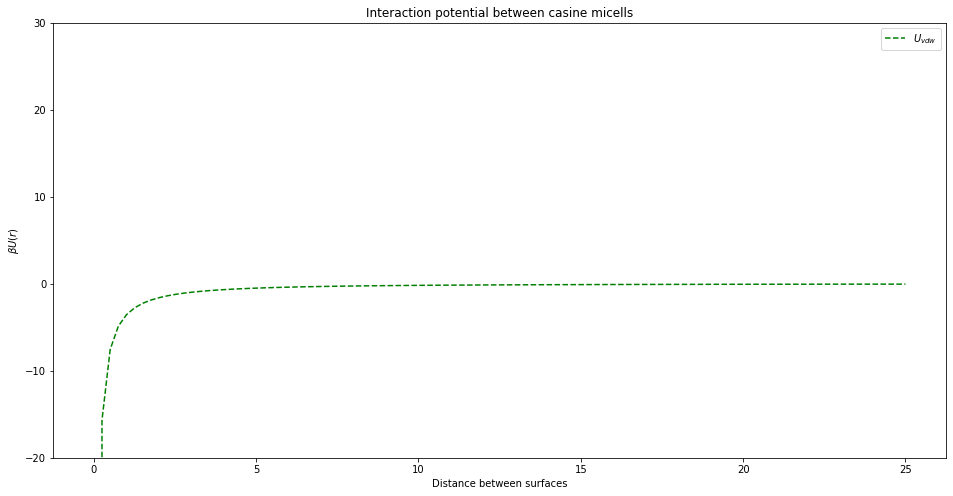

In [3]:
dists = np.linspace(0.00001,25,100)
vdws = []


for i in dists:
  radius = 50
  dist_between = 2*radius + i
  tm1 = mc.Molecule(np.array([0.0,0.0,0.0]),radius)
  tm2 = mc.Molecule(np.array([dist_between,0.0,0.0]),radius)
  vdws.append(fc.vdw(tm1,tm2))

#print(dists)
#print(vdws)



plt.figure(figsize=(16,8))

plt.plot(dists, vdws, c="green", label = "$U_{vdw}$", linestyle='--')

plt.ylim((-20,30))
plt.title("Interaction potential between casine micells")
plt.xlabel("Distance between surfaces")
plt.ylabel(r"$\beta U(r)$")
plt.legend()
plt.show()